# Task 10

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

For the dataset `water.csv`
- build a decision tree
- evaluate the classifier
- give the numbers of the leaves where the obsesrvations will go:

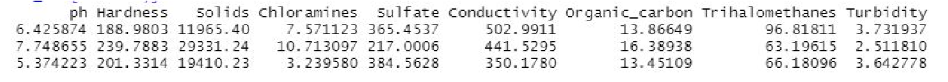

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving water.csv to water.csv


In [ ]:
df = pd.read_csv('water.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,7.424764,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,3.716080,129.422921,18630.057858,6.635246,332.759842,592.885359,15.180013,56.329076,4.500656,0
3,8.099124,224.236259,19909.541732,9.275884,318.740022,418.606213,16.868637,66.420093,3.055934,0
4,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
5,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.Potability.value_counts(normalize=True)

,proportion
Potability,
0,0.60989
1,0.39011


<Axes: xlabel='Potability', ylabel='count'>

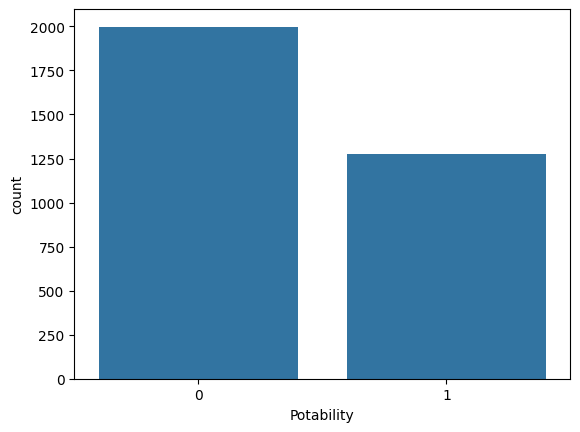

In [ ]:
sns.countplot(x='Potability', data=df)

## Test/Train sets

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# to check the proportion is still ok
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64
Potability
0    0.605617
1    0.394383
Name: proportion, dtype: float64
Potability
0    0.622711
1    0.377289
Name: proportion, dtype: float64


## Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3) # criterion='gini' by default
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Prediction

In [ ]:
pred = model.predict(X_test)

### Evaluation

We use the confusion matrix:

$$
\begin{array}{cc}
 & predicted\\
observed & \begin{array}{ccc}
 & 0 & 1\\
0 & TN & FP\\
1 & FN & TP
\end{array}
\end{array}
$$

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[464,  46],
       [249,  60]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.6398046398046398

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=['No(0)','Yes(1)']))

              precision    recall  f1-score   support

       No(0)       0.65      0.91      0.76       510
      Yes(1)       0.57      0.19      0.29       309

    accuracy                           0.64       819
   macro avg       0.61      0.55      0.52       819
weighted avg       0.62      0.64      0.58       819



In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, pred)

0.11944149837632168

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


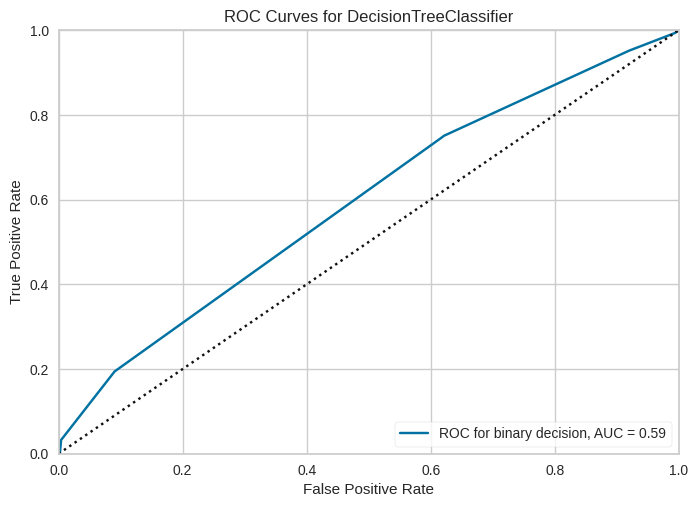

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(model, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

### Visualization

In [ ]:
from sklearn import tree
features = X.columns

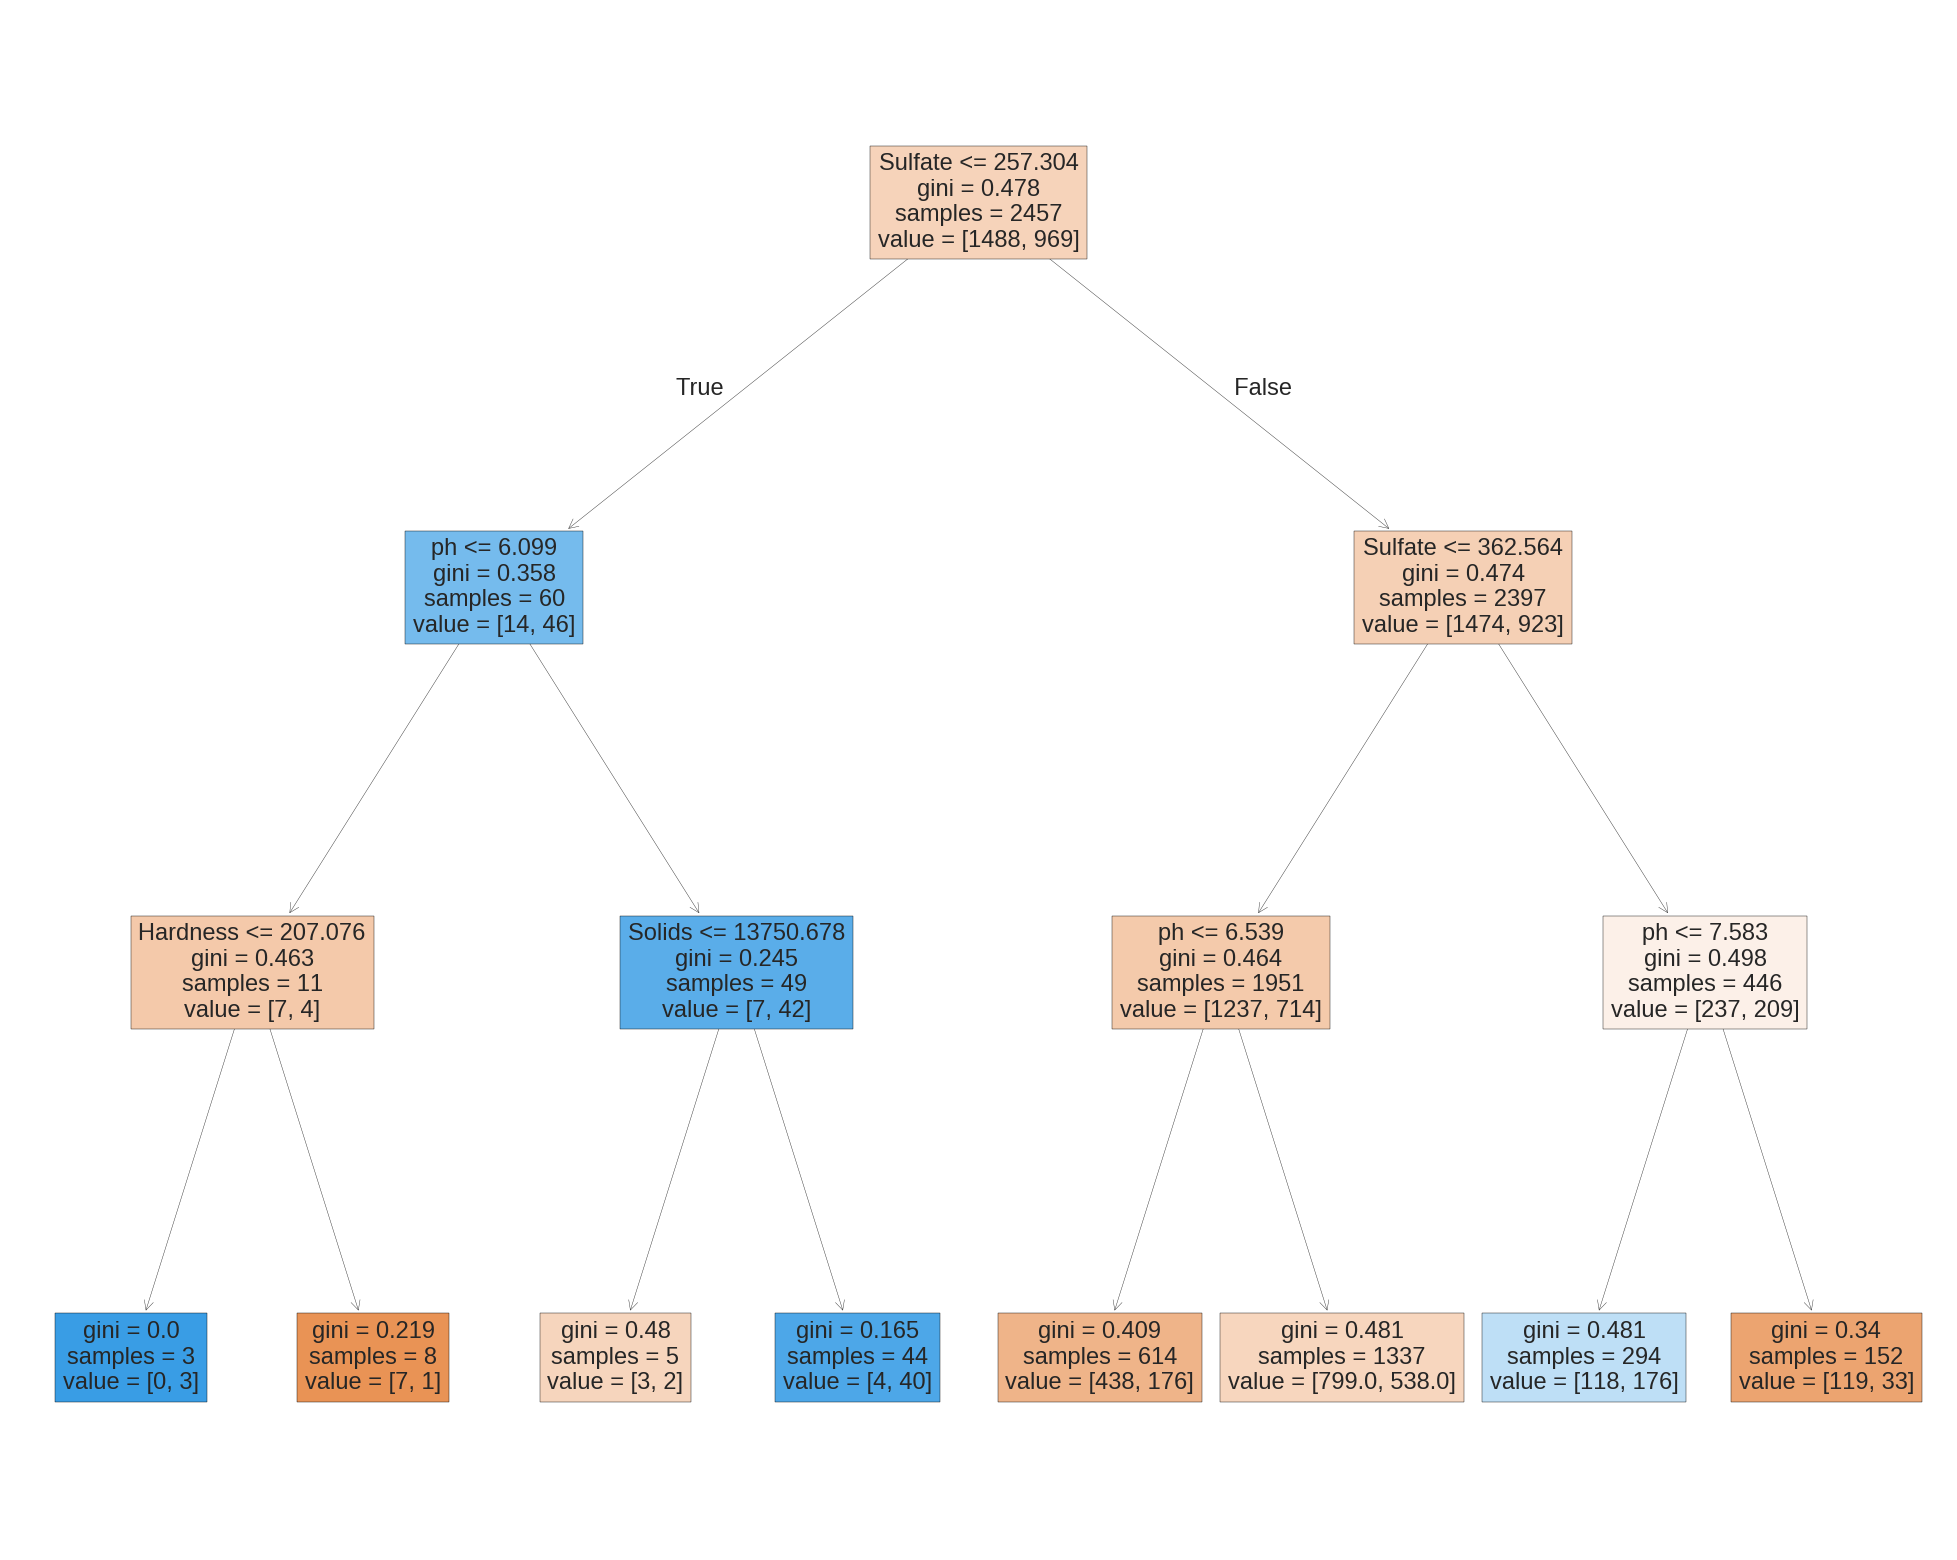

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=features,
                   filled=True)

### Leaf observations

* First observation lays in leaf no. 7
* Second observation lays in leaf no. 4
* Third observation lays in leaf no. 7

*Note: The leaves have been numbered counting from left to write starting at 1*

In [ ]:
d = X_train.copy()
d['Potability'] = y_train

In [ ]:
leaf7 = d.loc[(d.Sulfate>362.564) & (d.ph<=7.583)]
leaf7

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3162,6.185925,236.034783,1198.943699,6.140033,374.095388,436.236198,11.093811,99.775078,4.090264,1
1492,7.368166,204.041451,8524.874646,9.469763,429.814322,328.565288,11.173155,88.888819,3.684263,1
1903,6.405392,183.867245,20526.306835,8.450272,366.176634,548.637702,13.448797,69.054138,4.531921,1
2012,7.361600,231.793183,29169.720783,7.929904,375.097188,389.272645,13.853116,39.532787,3.751589,1
1672,6.124847,151.691358,15092.017645,6.610788,382.318961,388.137531,16.621959,69.167847,4.211968,0
...,...,...,...,...,...,...,...,...,...,...
1516,7.330197,159.803720,14884.339958,9.194575,411.100692,404.195912,17.375739,51.153972,2.884715,1
2392,6.644345,152.537418,19731.749181,10.886742,373.988714,463.747681,15.534904,61.151290,5.294159,1
770,5.729303,162.857585,34573.678786,5.654856,415.287072,297.631365,13.990842,76.744677,3.556395,1
1639,7.329698,186.365549,7557.021271,9.454207,406.038068,288.368713,12.861417,72.187015,4.116263,1


In [ ]:
leaf4=d.loc[(d.Sulfate<=257.304) & (d.ph>6.099) & (d.Solids>13750.678)]
leaf4

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1107,6.879959,163.593339,44586.812651,2.741712,219.148935,554.045105,16.521942,67.533260,5.688207,1
1566,6.191241,231.322797,29778.357877,4.381097,248.304391,488.954164,13.022135,54.060851,3.315071,1
1557,7.518517,158.207647,45243.028953,4.064878,247.180038,399.766965,16.086232,53.502086,4.108857,1
1073,6.842028,172.731433,28894.476970,4.250917,244.285145,559.629340,21.340849,51.274712,2.959750,1
1555,8.942046,215.673786,56488.672413,3.231438,129.000000,541.915468,9.313771,70.828374,4.354288,1
1100,7.269652,155.157520,31161.368388,3.181183,244.795198,506.010135,17.385515,73.115053,3.789237,1
2097,11.568768,192.924448,39234.470184,8.860762,235.995461,463.435102,19.628177,81.496529,3.761288,0
282,8.210444,167.102192,13933.085360,10.422842,243.485942,391.068874,13.747058,61.058210,4.976055,1
2429,8.848927,262.598329,24417.861325,5.399013,241.126298,493.855489,13.262439,47.112991,5.992325,1
1898,6.309892,133.649925,31062.371915,6.975602,252.108925,381.058776,17.200008,71.181544,3.603040,1


In [ ]:
leaf4.shape

(44, 10)